In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from datetime import datetime as dt
from datetime import timedelta as td
import time


## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [7]:
img = cv2.imread('./data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape
Z = img.reshape((-1, 3))

## 1-1. cluster with only RGB values

In [8]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

 1 photo finish, it takes 3 seconds 
 2 photo finish, it takes 6 seconds 
 3 photo finish, it takes 15 seconds 
 4 photo finish, it takes 39 seconds 
 5 photo finish, it takes 71 seconds 
 All photos has finished, it takes 136 seconds 


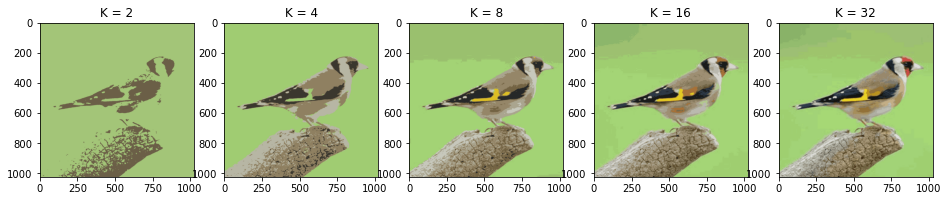

In [9]:
#h, w, c = img.shape
#Z = img.reshape((-1, 3))
#----place to upper area----
Ks=[2,4,8,16,32]
plt.figure(figsize=(16,12))

total_start_time = dt.now()
for i,K in enumerate(Ks):
    #-----------------------------------------------------------------------------
    local_start_time = dt.now()
    #-----------------------------------------------------------------------------
    labels, center = km_clust(Z, K)
    #print(center)
    center = np.uint8(center[:,:3])
    #print(center)
    new_img = center[labels.flatten()]
    new_img = new_img.reshape(img.shape)
    #-----------------------------------------------------------------------------
    time_consumption = dt.now() - local_start_time
    print(f' {i+1} photo finish, it takes {time_consumption.seconds} seconds ')
    #-----------------------------------------------------------------------------
    plt.subplot(1, len(Ks), i+1)
    plt.title(f"K = {K}")
    plt.imshow(new_img)

print(f' All photos has finished, it takes {(dt.now()-total_start_time).seconds} seconds ')
plt.show()

## 1-2. cluster with RGB values and the location

 1 photo finish, it takes 4 seconds 
 2 photo finish, it takes 6 seconds 
 3 photo finish, it takes 11 seconds 
 4 photo finish, it takes 15 seconds 
 5 photo finish, it takes 31 seconds 
 6 photo finish, it takes 77 seconds 
 All photos has finished, it takes 146 seconds 


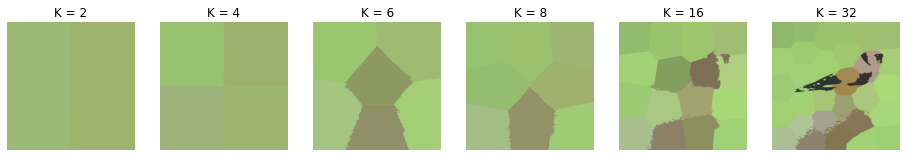

In [10]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,6,8,16,32]
plt.figure(figsize=(16,12))

total_start_time = dt.now()

for i, K in enumerate(Ks):
    #-----------------------------------------------------------------------------
    local_start_time = dt.now()
    #-----------------------------------------------------------------------------
    
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    
    #-----------------------------------------------------------------------------
    time_consumption = dt.now() - local_start_time
    print(f' {i+1} photo finish, it takes {time_consumption.seconds} seconds ')
    #-----------------------------------------------------------------------------

    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

print(f' All photos has finished, it takes {(dt.now()-total_start_time).seconds} seconds ')
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

 1 photo finish, it takes 5 seconds 
 2 photo finish, it takes 8 seconds 
 3 photo finish, it takes 8 seconds 
 4 photo finish, it takes 13 seconds 
 5 photo finish, it takes 34 seconds 
 6 photo finish, it takes 67 seconds 
 All photos has finished, it takes 138 seconds 


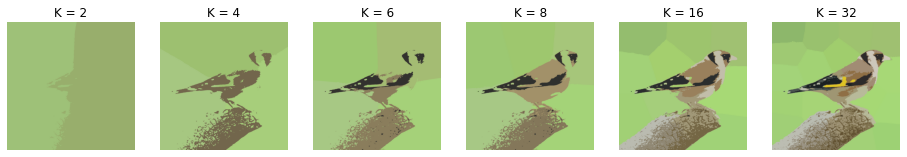

In [11]:

h, w, c = img.shape
#Added location feature
Z = np.zeros((h, w, c+2))

location_max_range = img.shape[0]
color_max_range = 256 #RGB
color_to_location_scaler = location_max_range / color_max_range # = 1024/256

for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/color_to_location_scaler], [w/color_to_location_scaler]])


Z = Z.reshape(-1, 5)

#Ks = [2]
Ks = [2,4,6,8,16,32]
plt.figure(figsize=(16,12))

total_start_time = dt.now()

for i, K in enumerate(Ks):
    #-----------------------------------------------------------------------------
    local_start_time = dt.now()
    #-----------------------------------------------------------------------------
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    
    #-----------------------------------------------------------------------------
    time_consumption = dt.now() - local_start_time
    print(f' {i+1} photo finish, it takes {time_consumption.seconds} seconds ')
    #-----------------------------------------------------------------------------

    plt.subplot(1, len(Ks), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
print(f' All photos has finished, it takes {(dt.now()-total_start_time).seconds} seconds ')
plt.show()